In [40]:
!pip install scipy
!pip install scikit-learn


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Import-Data" data-toc-modified-id="Import-Data-0.1">Import Data</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-0.2">Data Exploration</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-1">EDA</a></span><ul class="toc-item"><li><span><a href="#Education" data-toc-modified-id="Education-1.1">Education</a></span></li><li><span><a href="#Loan-duration" data-toc-modified-id="Loan-duration-1.2">Loan duration</a></span></li><li><span><a href="#Number-of-loans" data-toc-modified-id="Number-of-loans-1.3">Number of loans</a></span></li><li><span><a href="#Purpose-of-loan" data-toc-modified-id="Purpose-of-loan-1.4">Purpose of loan</a></span></li><li><span><a href="#Age" data-toc-modified-id="Age-1.5">Age</a></span></li><li><span><a href="#Job" data-toc-modified-id="Job-1.6">Job</a></span></li></ul></li><li><span><a href="#Correlation" data-toc-modified-id="Correlation-2">Correlation</a></span></li><li><span><a href="#Baseline-Logistic-Regression" data-toc-modified-id="Baseline-Logistic-Regression-3">Baseline Logistic Regression</a></span></li></ul></div>

### Import Data 

In [41]:

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, auc, accuracy_score, roc_auc_score,f1_score,log_loss,\
classification_report, roc_curve

import numpy as np
from scipy.stats import chi2_contingency
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools
from itertools import product

import warnings
warnings.filterwarnings("ignore");

RAND = 10

try:
    data = pd.read_excel('~/datasets/sample scoring data.xlsx')
except:
    data = pd.read_excel('/datasets/sample scoring data.xlsx')

data

,id code,checking,loan duration (m),history (number of loans),purpose of loan,loan amount,savings,employed,installp,marital,...,property,age,other,housing,exist credit bureau data,job,dependents,telephon,foreign,good_bad
0,1,1,6,4,3,1169,5,5,4,3,...,1,67,3,2,2,3,1,2,1,good
1,2,2,48,2,3,5951,1,3,2,2,...,1,22,3,2,1,3,1,1,1,bad
2,3,4,12,4,6,2096,1,4,2,3,...,1,49,3,2,1,2,2,1,1,good
3,4,1,42,2,2,7882,1,4,2,3,...,2,45,3,3,1,3,2,1,1,good
4,5,1,24,3,0,4870,1,3,3,3,...,4,53,3,3,2,3,2,1,1,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,4,12,2,2,1736,1,4,3,2,...,1,31,3,2,1,2,1,1,1,good
996,997,1,30,2,1,3857,1,3,4,1,...,2,40,3,2,1,4,1,2,1,good
997,998,4,12,2,3,804,1,5,4,3,...,3,38,3,2,1,3,1,1,1,good
998,999,1,45,2,3,1845,1,3,4,3,...,4,23,3,3,1,3,1,2,1,bad


### Data Exploration

In [42]:
print(data.shape)


print(data.info())


(1000, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id code                    1000 non-null   int64 
 1   checking                   1000 non-null   int64 
 2   loan duration (m)          1000 non-null   int64 
 3   history (number of loans)  1000 non-null   int64 
 4   purpose of loan            1000 non-null   object
 5   loan amount                1000 non-null   int64 
 6   savings                    1000 non-null   int64 
 7   employed                   1000 non-null   int64 
 8   installp                   1000 non-null   int64 
 9   marital                    1000 non-null   int64 
 10  co-applicant status        1000 non-null   int64 
 11  resident                   1000 non-null   int64 
 12  property                   1000 non-null   int64 
 13  age                        1000 non-null   int64 
 14

No missing values

In [43]:
#rename columns
data.columns = data.columns.str.replace(" ", "_").str.replace("-", "_")

data=data.rename(columns={"loan_duration_(m)": "loan_duration", "other": "home_adress", "savings": "number_of_products", "checking": "education", "property": "property_area"})

print(data.columns)

Index(['id_code', 'education', 'loan_duration', 'history_(number_of_loans)',
       'purpose_of_loan', 'loan_amount', 'number_of_products', 'employed',
       'installp', 'marital', 'co_applicant_status', 'resident',
       'property_area', 'age', 'home_adress', 'housing',
       'exist_credit_bureau_data', 'job', 'dependents', 'telephon', 'foreign',
       'good_bad'],
      dtype='object')


In [44]:
data.nunique()

id_code                      1000
education                       4
loan_duration                  33
history_(number_of_loans)       5
purpose_of_loan                10
loan_amount                   921
number_of_products              5
employed                        5
installp                        4
marital                         4
co_applicant_status             3
resident                        4
property_area                   4
age                            53
home_adress                     3
housing                         3
exist_credit_bureau_data        4
job                             4
dependents                      2
telephon                        2
foreign                         2
good_bad                        2
dtype: int64

In [45]:
# let's look at the distribution in features and also check outliers
data.describe()

,id_code,education,loan_duration,history_(number_of_loans),loan_amount,number_of_products,employed,installp,marital,co_applicant_status,resident,property_area,age,home_adress,housing,exist_credit_bureau_data,job,dependents,telephon,foreign
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2.577000,20.903000,2.54500,3271.258000,2.105000,3.384000,2.973000,2.68200,1.145000,2.845000,2.358000,35.546000,2.675000,1.929000,1.407000,2.904000,1.155000,1.404000,1.037000
std,288.819436,1.257638,12.058814,1.08312,2822.736876,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,1.050209,11.375469,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856
min,1.000000,1.000000,4.000000,0.00000,250.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.750000,1.000000,12.000000,2.00000,1365.500000,1.000000,3.000000,2.000000,2.00000,1.000000,2.000000,1.000000,27.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,500.500000,2.000000,18.000000,2.00000,2319.500000,1.000000,3.000000,3.000000,3.00000,1.000000,3.000000,2.000000,33.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,750.250000,4.000000,24.000000,4.00000,3972.250000,3.000000,5.000000,4.000000,3.00000,1.000000,4.000000,3.000000,42.000000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1000.000000,4.000000,72.000000,4.00000,18424.000000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,4.000000,75.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


there are no outliers in our dataset

In [46]:
# check at unique values in purpose_of_loan


data.purpose_of_loan.unique()



array([3, 6, 2, 0, 1, 9, 4, 5, 'X', 8], dtype=object)

In [47]:
display(data.query('purpose_of_loan in "X"'))

,id_code,education,loan_duration,history_(number_of_loans),purpose_of_loan,loan_amount,number_of_products,employed,installp,marital,...,property_area,age,home_adress,housing,exist_credit_bureau_data,job,dependents,telephon,foreign,good_bad
72,73,1,8,4,X,1164,1,5,3,3,...,4,51,1,3,2,4,2,2,1,good
83,84,1,24,2,X,1755,1,5,4,2,...,1,58,3,2,1,2,1,2,1,good
105,106,2,24,4,X,11938,1,3,2,3,...,3,39,3,2,2,4,2,2,1,bad
287,288,2,48,3,X,7582,2,1,2,3,...,4,31,3,3,1,4,1,2,1,good
310,311,2,48,2,X,5381,5,1,3,3,...,4,40,1,3,1,1,1,2,1,good
374,375,2,60,1,X,14782,2,5,3,2,...,4,60,1,3,2,4,1,2,1,bad
431,432,2,24,2,X,11328,1,3,2,3,...,3,29,1,2,2,4,1,2,1,bad
442,443,2,20,3,X,2629,1,3,2,3,...,3,29,1,2,2,3,1,2,1,good
594,595,1,24,1,X,1358,5,5,4,3,...,3,40,2,2,1,4,1,2,1,bad
665,666,4,24,4,X,6314,1,1,4,3,...,4,27,1,2,2,4,1,2,1,good


If we look at the data in this column, we can see that the number 7 is missing. Most likely there was an error in the data, so replace X with 7

In [48]:
data['purpose_of_loan'] = np.where((data.purpose_of_loan == 'X'), 7, data.purpose_of_loan)

data.purpose_of_loan.value_counts()

data.purpose_of_loan.astype('int64')

0      3
1      3
2      6
3      2
4      0
      ..
995    2
996    1
997    3
998    3
999    1
Name: purpose_of_loan, Length: 1000, dtype: int64

In [49]:
data.duplicated().sum()

0

## EDA 


First we need to study the target variable

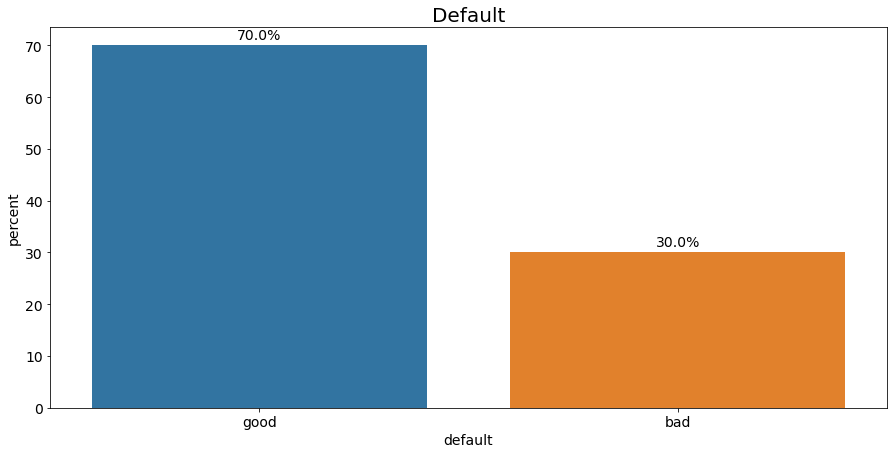

In [50]:

norm_target = (data
               .good_bad
               .value_counts(normalize=True)
               .mul(100)
               .rename('percent')
               .reset_index())

plt.figure(figsize=(15, 7))
ax = sns.barplot(x='index', y='percent', data=norm_target)


for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage, 
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points', 
                fontsize=14)

plt.title('Default', fontsize=20)

plt.xlabel('default', fontsize=14)
plt.ylabel('percent', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

we can note class imbalance

Let's build bar graphs and look at the distributions of features in two categories

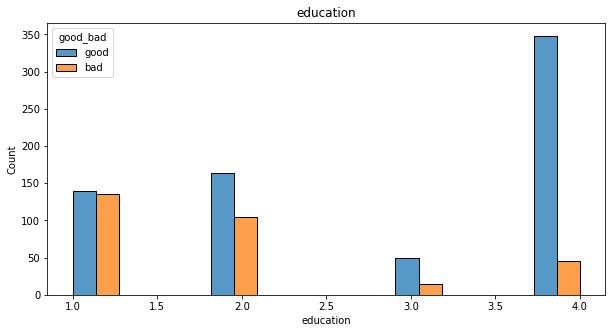

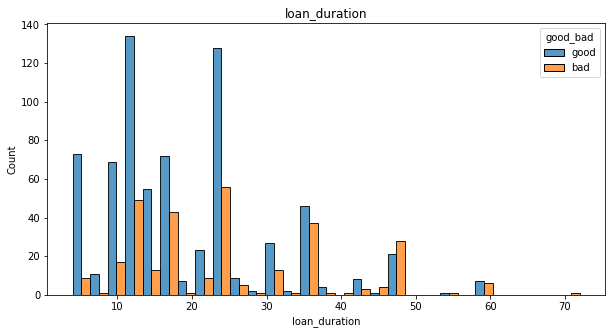

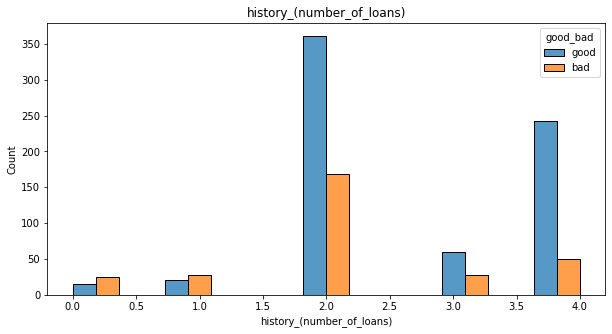

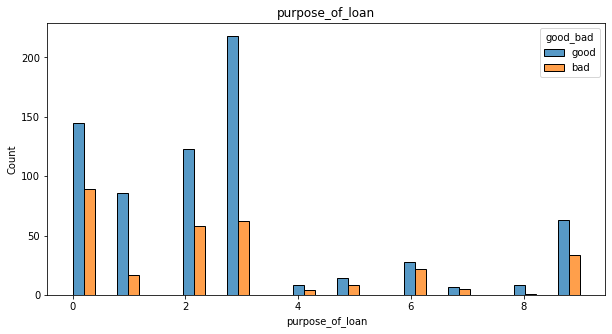

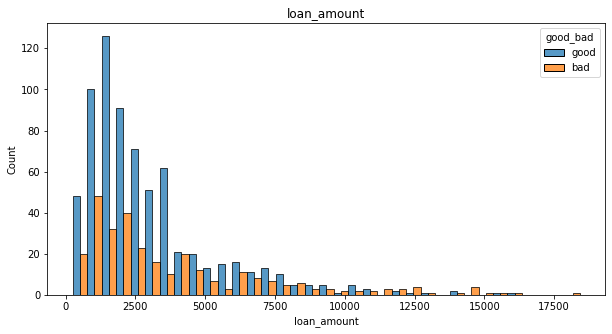

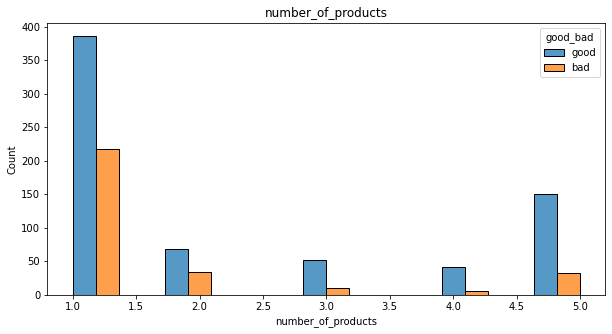

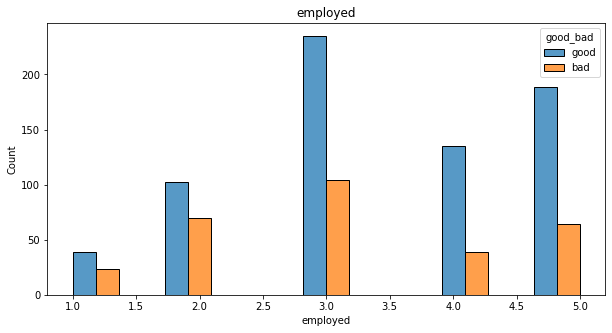

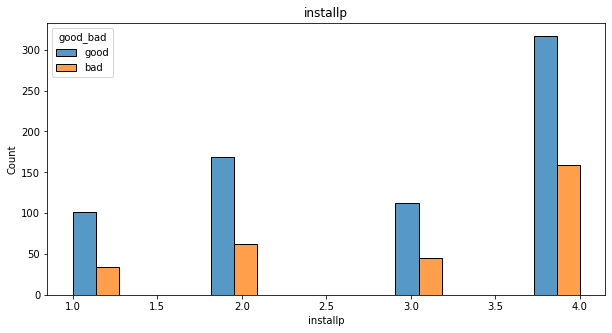

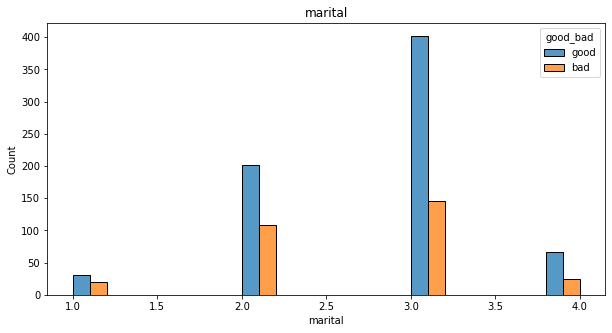

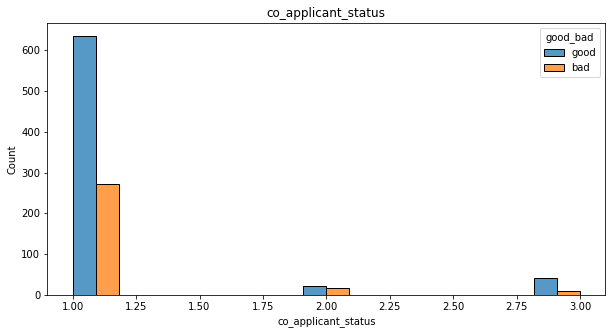

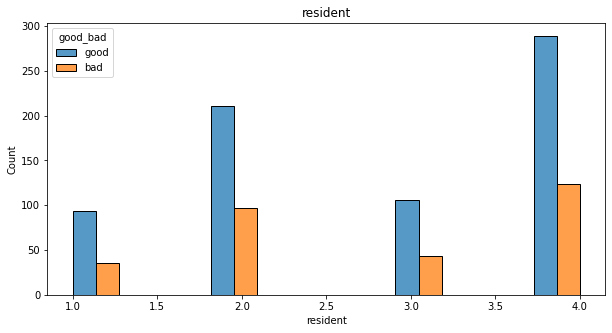

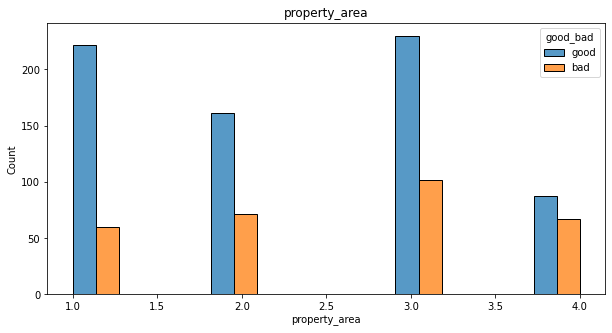

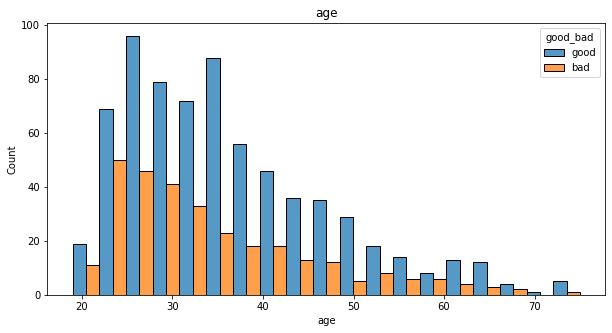

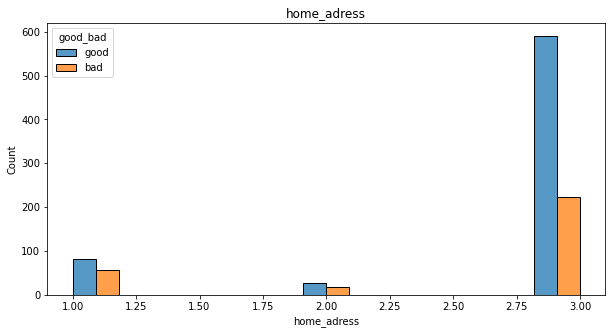

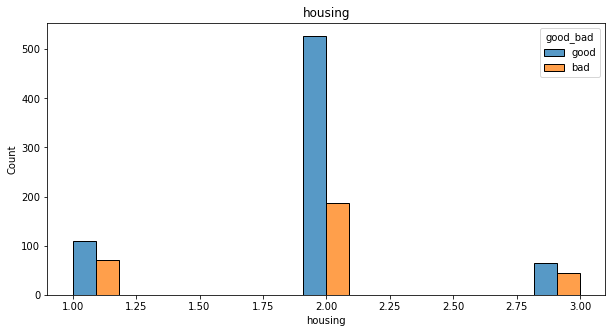

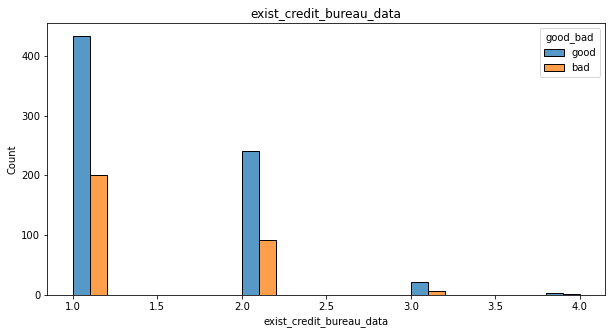

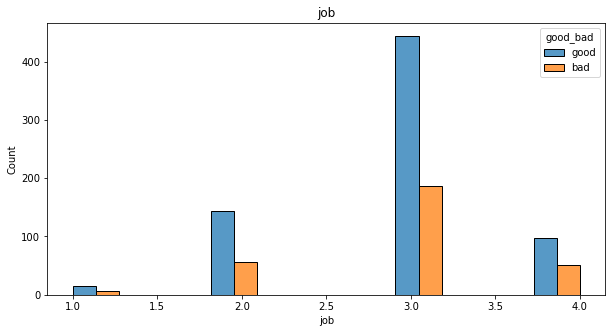

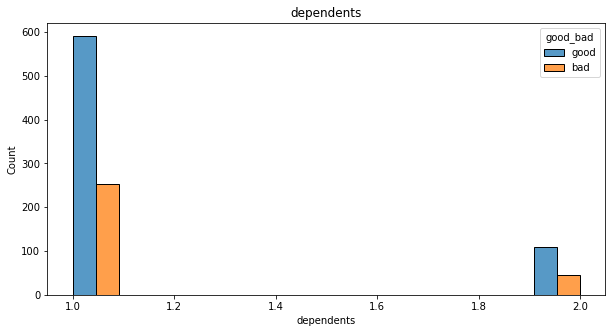

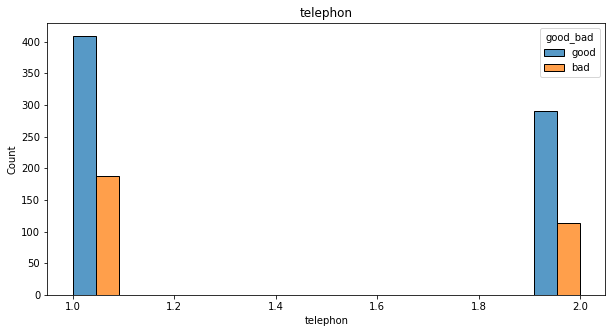

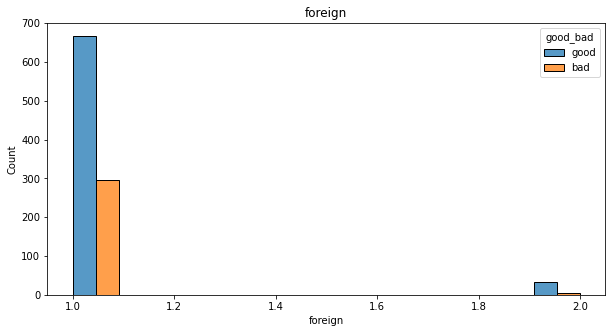

In [51]:
iterate_columns = data.drop(columns = ['good_bad', 'id_code'])

for column in iterate_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=data, x=column, hue="good_bad", multiple="dodge",common_norm=False)
    plt.title(column)  

    plt.show()

based on the graphs, we will consider in detail the most important features in which the classes are most unevenly distributed

### Education

In [52]:
def plot_features_good_bad(column):
    plt.figure(figsize=(15, 7))

    feature = (data.groupby(['good_bad'])[column]
                .value_counts(normalize=True) #normalization of data to the size of the dataset
                .rename('percentage')
                .mul(100)
                .reset_index()
                .sort_values(column))

    ax = sns.barplot(x=column, y="percentage", hue="good_bad", data=feature)

    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height())
        ax.annotate(percentage,  
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                    ha='center',  
                    va='center',
                    xytext=(0, 10),
                    textcoords='offset points',  
                    fontsize=14)

    plt.title(column+'-Default', fontsize=20)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('default', fontsize=14)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14);

<Figure size 1080x504 with 0 Axes>

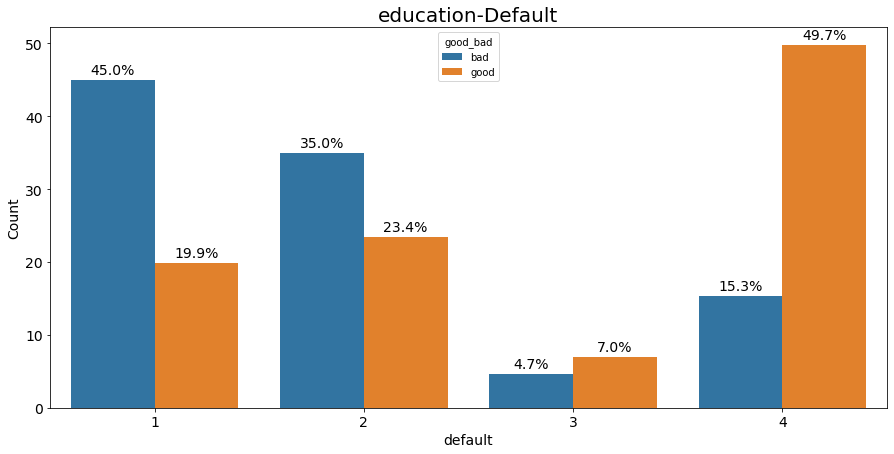

In [53]:
plt.figure(figsize=(15, 7))
plot_features_good_bad('education')

clients from the 4th category of education are better borrowers than clients from the 1st or 2nd

### Loan duration

Next, consider another interesting feature - the term of the loan.

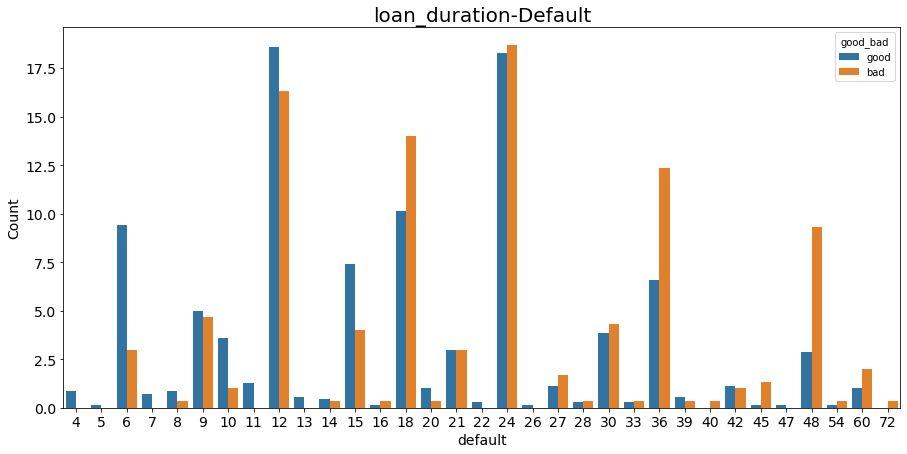

In [54]:
plt.figure(figsize=(15, 7))

loan_duration = (data.groupby(['good_bad'])['loan_duration']
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('loan_duration'))

ax = sns.barplot(x="loan_duration", y="percentage", hue="good_bad", data=loan_duration)



plt.title('loan_duration-Default', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('default', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

We have a wide spread in the data from 4 months to 72 months, here we can distinguish peak values - "good" clients, those who take a loan for 24 months,12 months and 6, "bad" clients take a loan for 36 and 48.

We can look at the relationship between the age of the borrower and the loan_duration(the most peak values)

In [55]:
data_month = data.query('loan_duration == (12,6,36,24,48)')
display(data_month.groupby('loan_duration')['age'].median())

loan_duration
6     36.0
12    35.0
24    33.0
36    32.0
48    34.5
Name: age, dtype: float64

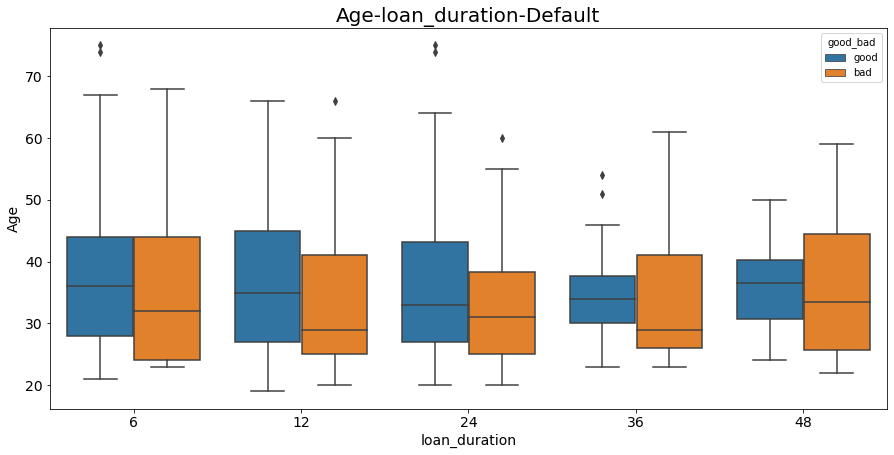

In [56]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=data_month, x="loan_duration", y="age", hue="good_bad")

plt.title('Age-loan_duration-Default', fontsize=20)
plt.ylabel('Age', fontsize=14)
plt.xlabel('loan_duration', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

As we can see from the graph, the average age of "bad" clients is always less than that of "good" ones. You can also notice that the age range of "good" clients who take a loan for 36 months and 48 is not so big.

let's analyze the relationship between loan_duration and loan_amount

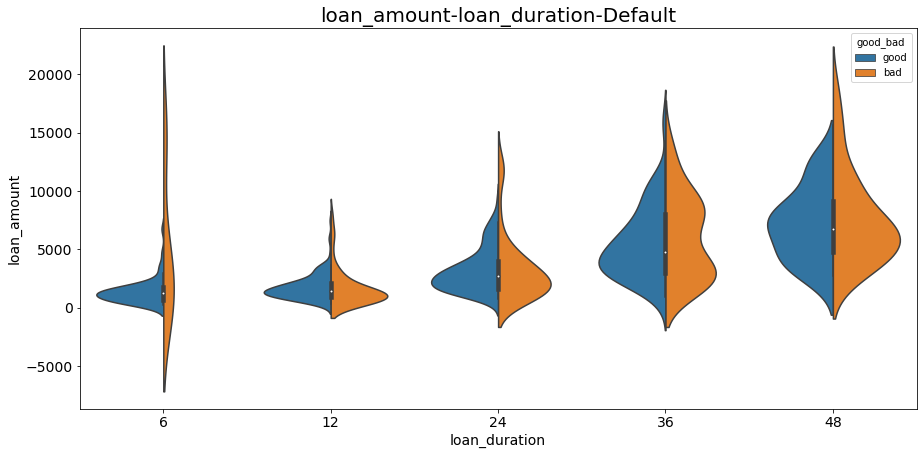

In [57]:
plt.figure(figsize=(15, 7))
sns.violinplot(data=data_month, x="loan_duration", y="loan_amount", hue="good_bad", split=True)

plt.title('loan_amount-loan_duration-Default', fontsize=20)
plt.ylabel('loan_amount', fontsize=14)
plt.xlabel('loan_duration', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [58]:
display(data_month.groupby('loan_duration')['loan_amount'].describe())

,count,mean,std,min,25%,50%,75%,max
loan_duration,,,,,,,,
6,75.0,1787.733333,2422.428463,250.0,691.50,1237.0,1746.5,14896.0
12,179.0,1787.446927,1266.271498,339.0,954.50,1412.0,2160.0,7865.0
24,184.0,3243.554348,2173.957598,717.0,1601.50,2701.0,4025.5,12579.0
36,83.0,5748.180723,3270.052368,909.0,2970.50,4795.0,8075.5,15857.0
48,48.0,7405.604167,3516.590538,2751.0,4742.25,6719.5,9133.5,18424.0


Looking at the distribution of variables, we can see that for 6 months the loan amount has a large scatter of data, the maximum loan amount for 12 months is the smallest of all 5 indicators.

### Number of loans

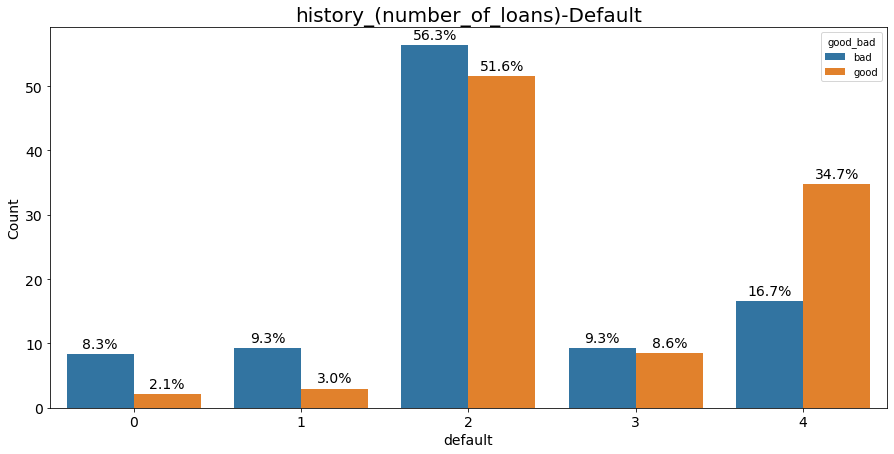

In [59]:
plot_features_good_bad('history_(number_of_loans)')

here we can determine that clients with two loans are bad borrowers. the best clients with 4 credits

### Purpose of loan

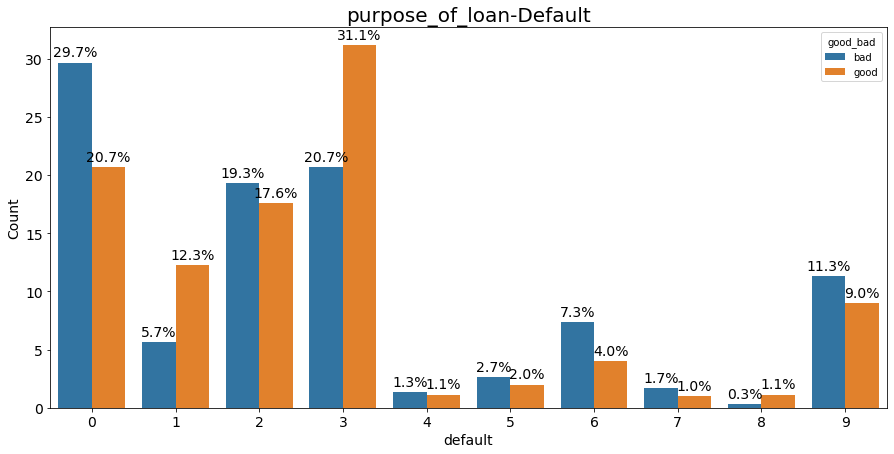

In [60]:
plot_features_good_bad('purpose_of_loan')

We have 10 different loan categories, the first four are the most in demand, in category 0 the number of "bad" clients significantly exceeds the level of "good" clients, in the third category it is vice versa.

### Age 

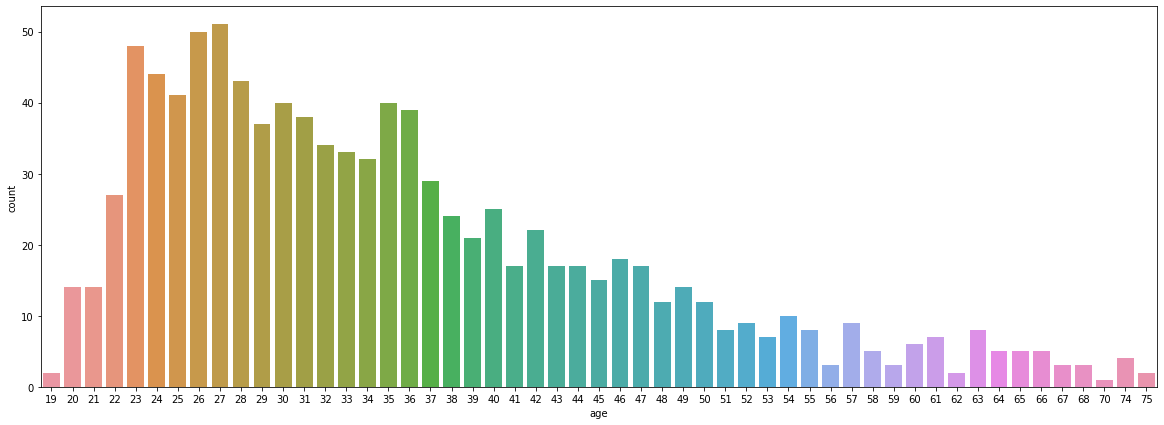

In [61]:
#fig, axes = plt.subplots(figsize = (14, 4))
plt.figure(figsize=(20, 7))

sns.countplot(x='age', data=data);

plt.show()

The age feature is represented by values that are shifted to the left

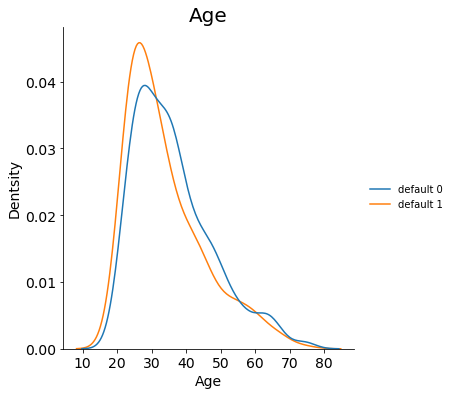

In [62]:
sns.displot(
    {
        "default 0": data[data.good_bad == 'good'].age,
        "default 1": data[data.good_bad == 'bad'].age
    },
    kind="kde",
    common_norm=False
)

plt.title('Age', fontsize=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);



In [63]:
data.groupby('good_bad')['age'].agg(lambda x:x.value_counts().index[0])

good_bad
bad     23
good    27
Name: age, dtype: int64

The age of "bad" and "good" clients is almost identical

### Job

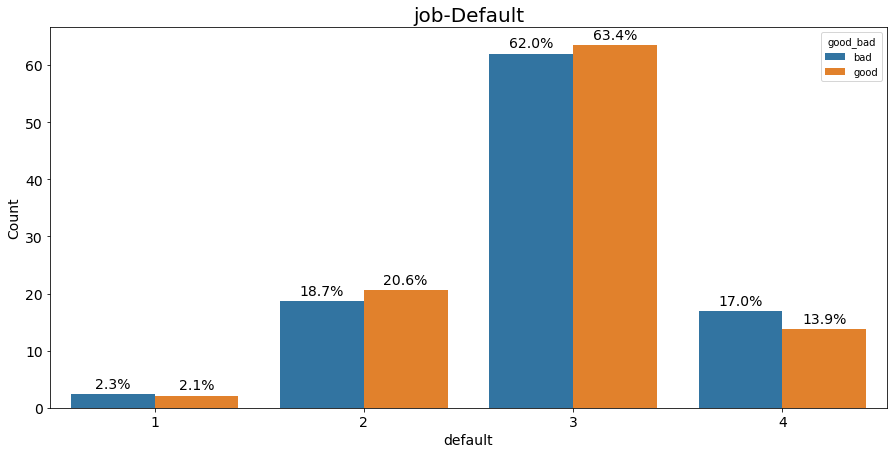

In [64]:
plot_features_good_bad('job')



In general, there are no specific patterns, the distribution of "bad" and "good" inside the groups is approximately the same.

## Correlation

(13.0, 0.0)

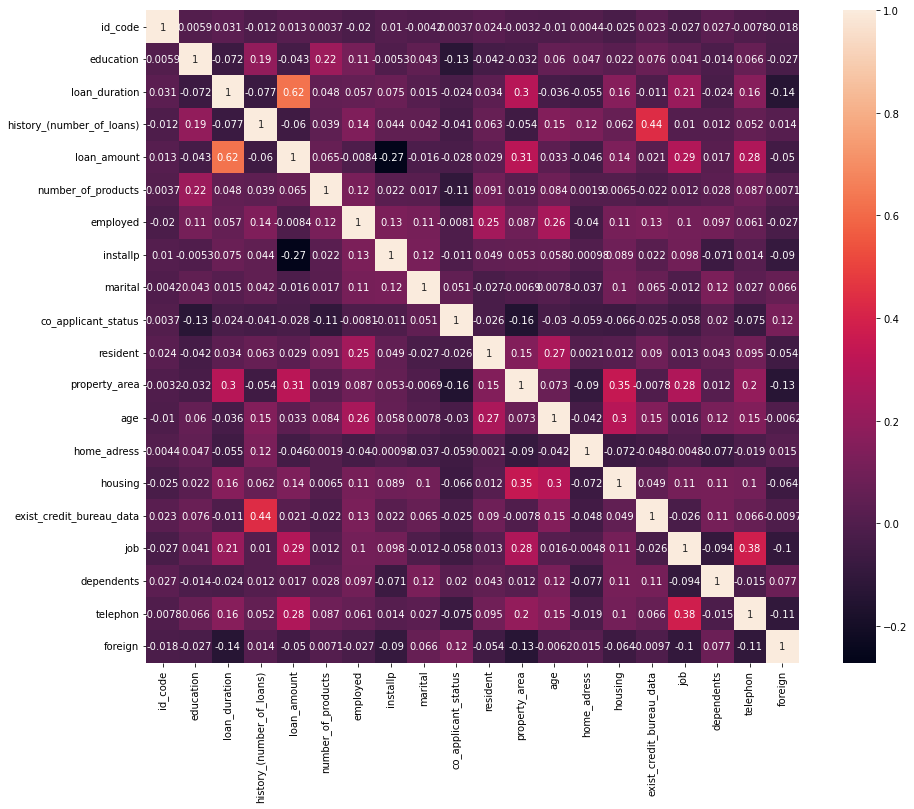

In [65]:
cm = data.corr() 

plt.figure(figsize =(16, 12))

sns.heatmap(cm, annot=True, square=True)
ax.set_ylim(
    13, 0
) 

We have one pair of correlated features, but the correlation at the level of 0.6 is considered not very strong.

##  Baseline Logistic Regression

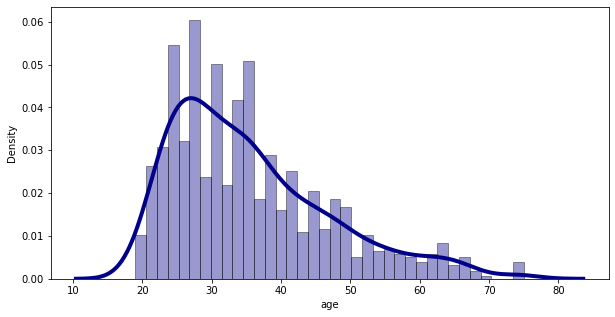

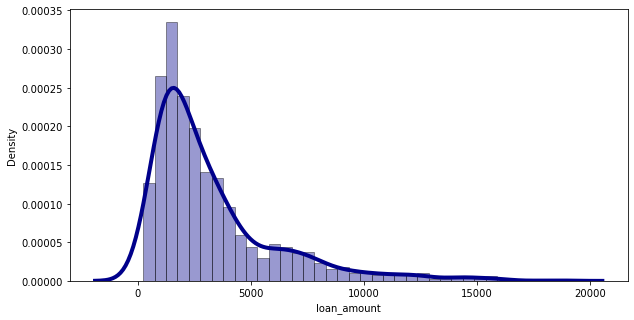

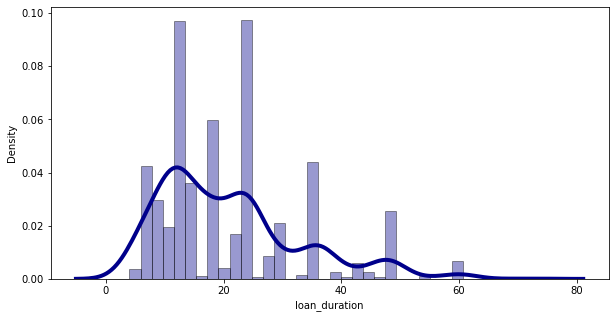

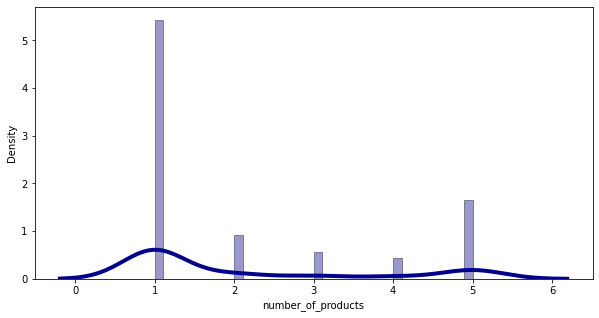

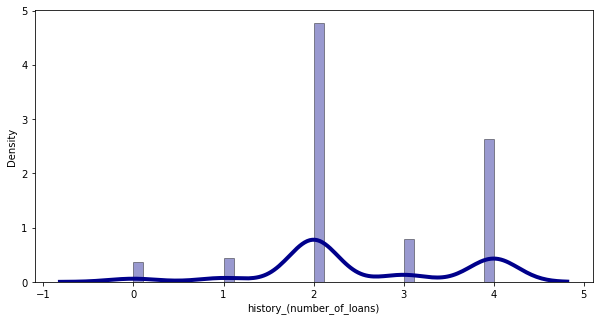

In [66]:


num_cols = ['age', 'loan_amount', 'loan_duration', 'number_of_products', 'history_(number_of_loans)' ]

for column in num_cols:
    plt.figure(figsize=(10, 5))    
    sns.distplot(
             data[column],
             hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

As we can see above on the graphs of numerical features, they do not have a normal distribution, so we have to apply logarithm.

In [67]:
for column in num_cols:
    data[column] = np.log(data[column]+1)

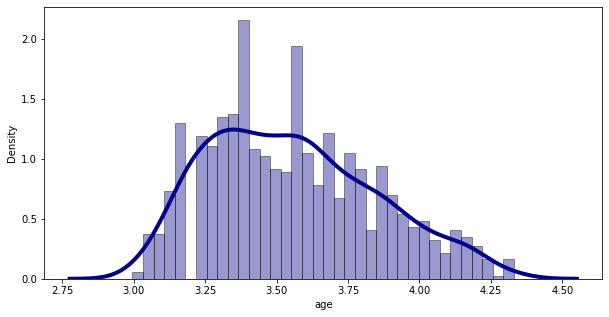

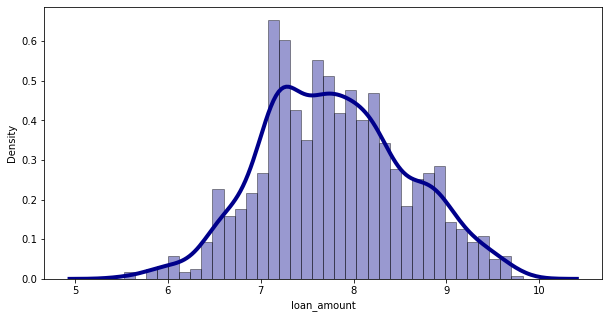

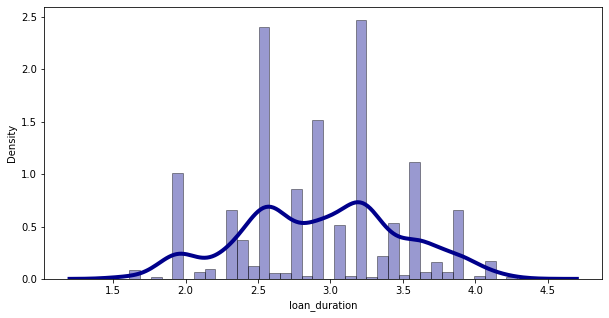

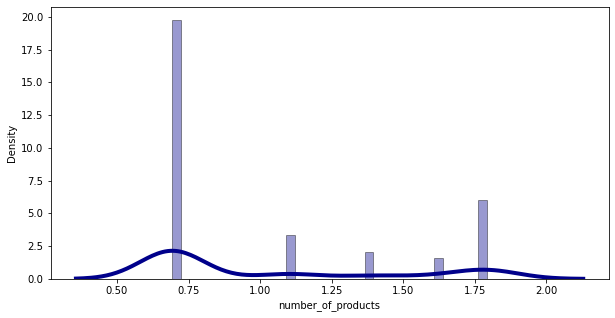

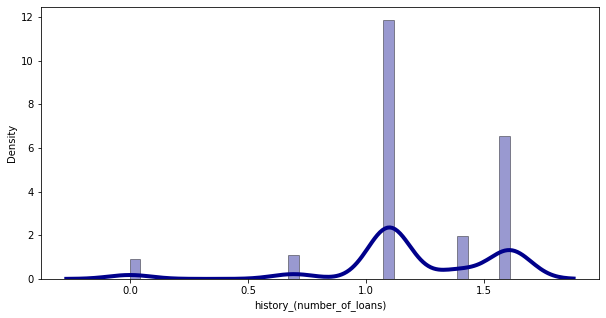

In [68]:
for column in num_cols:
    plt.figure(figsize=(10, 5))    
    sns.distplot(
             data[column],
             hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


Let's convert discrete variables to dummy variables

In [69]:
data_new = pd.get_dummies(data, columns=[
'education', 'purpose_of_loan', 'employed', 'installp', 
                                         'marital','co_applicant_status','resident', 'property_area', 
                                        'home_adress','housing', 'exist_credit_bureau_data', 'job'])


In [70]:
data_new.head()

,id_code,loan_duration,history_(number_of_loans),loan_amount,number_of_products,age,dependents,telephon,foreign,good_bad,...,housing_2,housing_3,exist_credit_bureau_data_1,exist_credit_bureau_data_2,exist_credit_bureau_data_3,exist_credit_bureau_data_4,job_1,job_2,job_3,job_4
0,1,1.945910,1.609438,7.064759,1.791759,4.219508,1,2,1,good,...,1,0,0,1,0,0,0,0,1,0
1,2,3.891820,1.098612,8.691483,0.693147,3.135494,1,1,1,bad,...,1,0,1,0,0,0,0,0,1,0
2,3,2.564949,1.609438,7.648263,0.693147,3.912023,2,1,1,good,...,1,0,1,0,0,0,0,1,0,0
3,4,3.761200,1.098612,8.972464,0.693147,3.828641,2,1,1,good,...,0,1,1,0,0,0,0,0,1,0
4,5,3.218876,1.386294,8.491055,0.693147,3.988984,2,1,1,bad,...,0,1,0,1,0,0,0,0,1,0


In [71]:

data_new['good_bad'] = np.where((data_new.good_bad == 'good'), 0, data_new.good_bad)

data_new['good_bad'] = np.where((data_new.good_bad == 'bad'), 1, data_new.good_bad)

data_new['good_bad'] = data_new['good_bad'].astype('int') 

X = data_new.drop('good_bad', axis = 1)
y = data_new['good_bad']




In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, shuffle=True , random_state=0)


lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_score = lr.predict_proba(X_test)[:,1]



In [73]:


print('roc-auc:', roc_auc_score(y_test, y_score))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))






roc-auc: 0.7789285714285714
precision: 0.5616438356164384
recall: 0.6833333333333333
f1: 0.6165413533834587


In [74]:


metrics = pd.DataFrame(
    index=['roc-auc', 'precision', 'recall', 'f1'])

metrics['Baseline_LR'] = [roc_auc_score(y_test, y_score),
                          precision_score(y_test, y_pred),
                          recall_score(y_test, y_pred),
                          f1_score(y_test, y_pred)
                         ]

display(metrics)

,Baseline_LR
roc-auc,0.778929
precision,0.561644
recall,0.683333
f1,0.616541


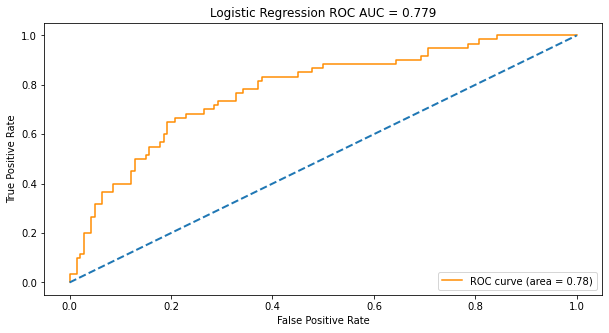

In [75]:


fpr, tpr, thresholds = roc_curve(y_test, y_score)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.show()




              precision    recall  f1-score   support

           0       0.85      0.77      0.81       140
           1       0.56      0.68      0.62        60

    accuracy                           0.74       200
   macro avg       0.71      0.73      0.71       200
weighted avg       0.76      0.74      0.75       200



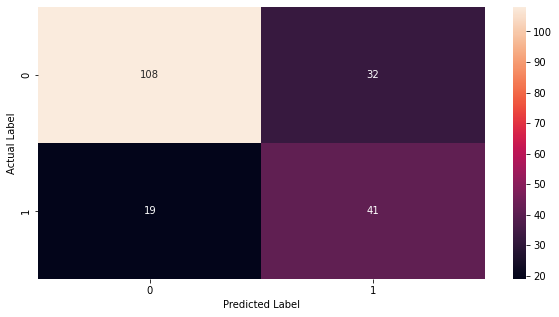

In [76]:
#Let's create a confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,5))  
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_pred))

As a result we got the metric roc-auc at the level of 0.78, which is not so bad, but certainly not ideal. There will always be a struggle between the choice of precision or recall. It is up to the company and its objectives to decide which approach is the best in each particular situation
